In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
#Changing defaults fonts for plot

font = {'family' : 'sans-serif',
        'size'   : 18}
plt.rc('font', **font)

In [2]:
df= pd.read_csv("2nd_fullscrape_clean.csv", index_col= 0, encoding='latin-1')

In [22]:
df.head()

,Wine,Location,Rating,Price,Year
0,Denner 2015 Dirt Worshipper Syrah (Central Coast),Central Coast,96,70.0,2015
1,Villa Creek 2014 Slide Hill Syrah (Edna Valley),Central Coast,95,65.0,2014
2,Epoch Estate Wines 2014 Block B Paderewski Vin...,Central Coast,95,95.0,2014
3,MTR Productions 2012 Memory Found Syrah (Walla...,Columbia Valley,94,85.0,2012
4,Halcón 2015 Alturas Syrah (Yorkville Highlands),North Coast,94,32.0,2015


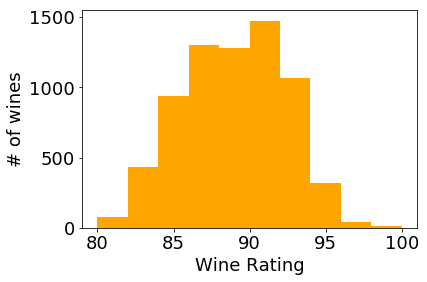

In [6]:
plt.close("all")
fig, ax = plt.subplots()
ax.hist(df["Rating"],10, color="orange")

ax.set_xlabel("Wine Rating")
ax.set_ylabel("# of wines")

plt.show()

In [29]:
lpdf.corr()

,Rating,Price,Year
Rating,1.000000,0.508646,0.356033
Price,0.508646,1.000000,0.347668
Year,0.356033,0.347668,1.000000


In [7]:
#Preparing for summary plot of all wines

lpdf = df[df["Price"] < 200].copy() #Only looking at "low price" wine
lpdf["PR"] = list(zip(lpdf["Price"], lpdf["Rating"])) #Looking to get (Price, Rating) pairs
uPR = lpdf.groupby("PR").size() #Getting number of unique Price,Rating combinations
uPRdf = pd.DataFrame(uPR, columns=["count"])  #Making series into DataFrame
uPRdf.reset_index(inplace=True) #Making tuples a column in the DataFrame
uPRdf[['Price', 'Rating']] = uPRdf['PR'].apply(pd.Series) #Splitting tuples into seperate columns

uPRdf.sort_values(by=["count"], ascending=True, inplace=True) #Sorting by the number of times each combo appears

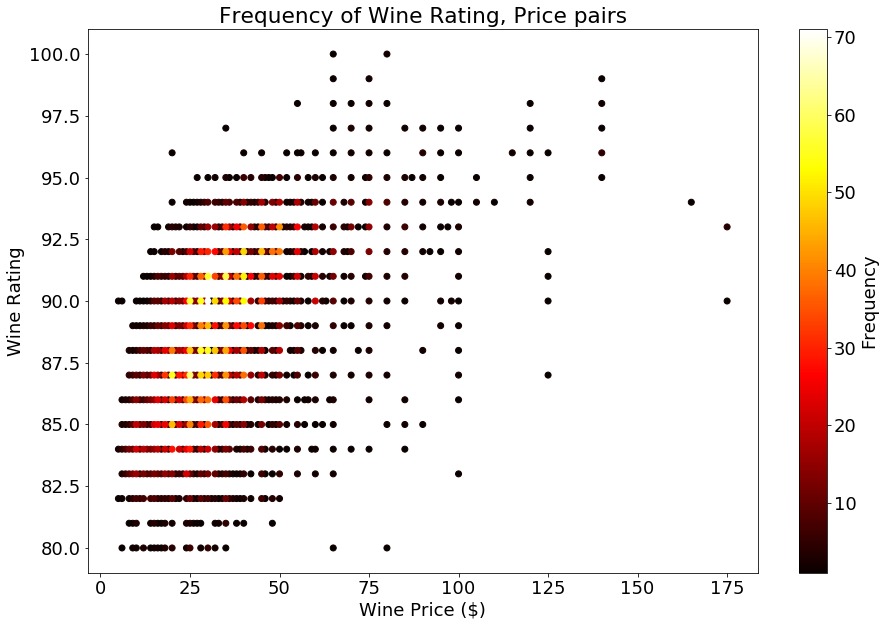

In [8]:
#Scatter plot where marker color corresponds to how common the Price,Rating combo is
plt.close("all")
fig, ax = plt.subplots(figsize=(15,10))

cc =ax.scatter(uPRdf["Price"], uPRdf["Rating"],c=uPRdf["count"], cmap=cm.hot)
cbar = plt.colorbar(cc)

ax.set_xlabel("Wine Price ($)")
ax.set_ylabel("Wine Rating")
ax.set_title("Frequency of Wine Rating, Price pairs")

cbar.set_label('Frequency')

plt.show() 

In [9]:
locgroup = lpdf.groupby("Location").size() #Grouping by region grown and sorting my number of wines from each region

In [10]:
locgroup.sort_values(ascending=False) #Most Syrah is grown in the Central Coast

Location
Central Coast        2145
Columbia Valley      1971
Sonoma                856
Napa                  394
Sierra Foothills      327
California Other      301
Southern Oregon       164
California            163
Central Valley        112
Washington Other       91
Oregon Other           84
Napa-Sonoma            84
South Coast            78
North Coast            55
Idaho                  34
Willamette Valley      17
Long Island            14
Colorado               12
Virginia               10
Finger Lakes           10
New Mexico              6
Arizona                 5
Michigan                4
Texas                   4
New York Other          2
Pennsylvania            2
Kentucky                1
Nevada                  1
Ohio                    1
Oklahoma                1
New Jersey              1
dtype: int64

In [11]:
#Importing weather data for 3 most common regions

sono= pd.read_csv("Sonoma_weather_month.csv")
coast= pd.read_csv("CCoast_weather_month.csv")
valley= pd.read_csv("CValley_weather_month.csv")

In [12]:
sono2 = sono.groupby("date").mean() #some months have multiple stations recording data, decided to average all stations
coast2 = coast.groupby("date").mean()
valley2 = valley.groupby("date").mean()

In [13]:
sono2

,CDSD,CLDD,DP01,DP10,DP1X,DSND,DSNW,DT00,DT32,DX32,...,EMSN,EMXP,EMXT,HDSD,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN
date,,,,,,,,,,,,,,,,,,,,,
1994-01-01T00:00:00,0.0,0.0,10.000000,4.000000,1.000000,0.0,0.0,0.0,8.0,0.0,...,0.0,1.160000,67.0,NaN,449.0,3.360000,0.0,47.6,59.5,35.8
1994-02-01T00:00:00,0.0,0.0,11.000000,9.000000,1.000000,0.0,0.0,0.0,7.0,0.0,...,0.0,1.000000,73.0,NaN,385.0,5.460000,0.0,49.1,60.9,37.3
1994-03-01T00:00:00,2.0,2.0,2.000000,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.210000,82.0,NaN,244.0,0.230000,0.0,56.2,71.0,41.3
1994-04-01T00:00:00,NaN,NaN,6.000000,4.000000,0.000000,0.0,0.0,0.0,0.0,NaN,...,0.0,0.590000,NaN,NaN,NaN,1.330000,0.0,NaN,NaN,42.7
1994-05-01T00:00:00,NaN,14.0,5.000000,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.600000,90.0,NaN,96.0,1.370000,0.0,62.0,76.6,47.4
1994-06-01T00:00:00,NaN,92.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.050000,105.0,NaN,11.0,0.050000,0.0,68.0,87.5,48.5
1994-07-01T00:00:00,NaN,90.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,96.0,4.0,4.0,0.000000,0.0,67.9,84.6,51.1
1994-08-01T00:00:00,NaN,134.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,102.0,5.0,0.0,0.000000,0.0,70.2,90.1,50.2
1994-09-01T00:00:00,NaN,85.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,98.0,12.0,7.0,0.000000,0.0,67.9,86.0,49.9


In [15]:
#Processing monthly weather data to get yearly averages
sono2["dt"] = pd.to_datetime(sono2.index)
sono2["Year"]=sono2["dt"].dt.year
sonogroup = sono2.groupby("Year").sum()

coast2["dt"] = pd.to_datetime(coast2.index)
coast2["Year"]=coast2["dt"].dt.year
coastgroup = coast2.groupby("Year").sum()

valley2["dt"] = pd.to_datetime(valley2.index)
valley2["Year"]=valley2["dt"].dt.year
valleygroup = valley2.groupby("Year").sum()

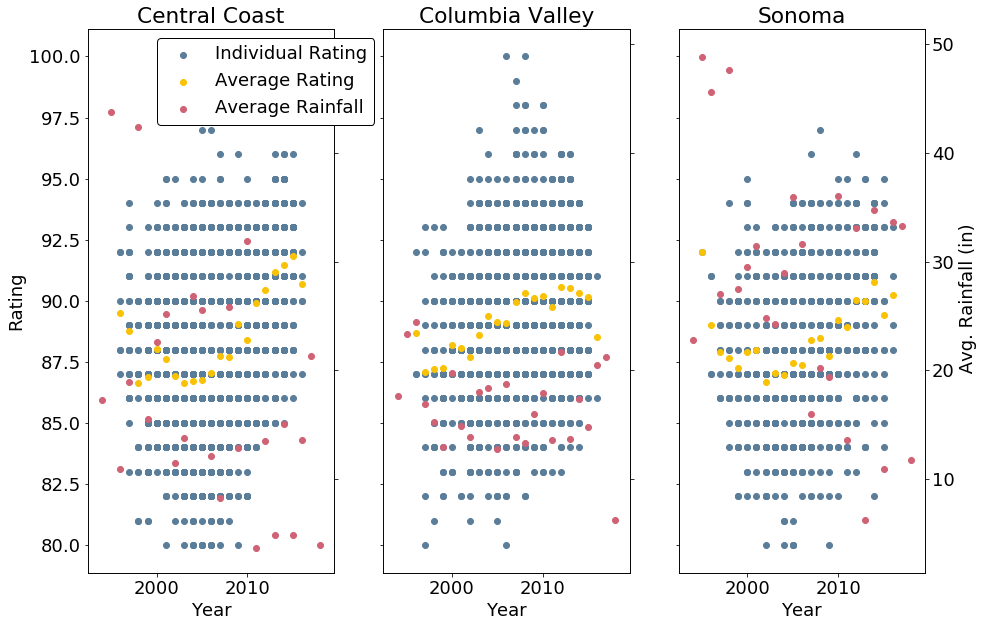

In [16]:
plt.close("all")
fig, ax = plt.subplots(1,3, sharey=True, sharex=True, figsize = (15,10))

#Scatter plot Rating vs. Year all wines grown in the Central Coast, Columbia Valley, and Sonoma

l0 =ax[0].scatter(df.loc[df[df["Location"] == "Central Coast"].index,"Year"],
           df.loc[df[df["Location"] == "Central Coast"].index,"Rating"], color="xkcd:steel blue", label="Individual Rating")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rating")
ax[0].set_title("Central Coast")

ax[1].scatter(df.loc[df[df["Location"] == "Columbia Valley"].index,"Year"],
           df.loc[df[df["Location"] == "Columbia Valley"].index,"Rating"], color="xkcd:steel blue")
ax[1].set_xlabel("Year" )
ax[1].set_title("Columbia Valley")

ax[2].scatter(df.loc[df[df["Location"] == "Sonoma"].index,"Year"],
           df.loc[df[df["Location"] == "Sonoma"].index,"Rating"], color="xkcd:steel blue")
ax[2].set_xlabel("Year")
ax[2].set_title("Sonoma")

#Adding average wine rating for each year and average rainfall for each location

group = df.groupby(["Location","Year"])["Rating"].mean()
ax0 = ax[0].twinx()
ax1 = ax[1].twinx()
ax2 = ax[2].twinx()
ax0.get_shared_y_axes().join(ax0, ax1, ax2)

l1 = ax[0].scatter(group["Central Coast"].index,group["Central Coast"].values, color="xkcd:goldenrod", label="Average Rating")
l2 = ax0.scatter(coastgroup.index,coastgroup["PRCP"].values, color="xkcd:rose", label="Average Rainfall" )
ax0.set_yticklabels([])

lines = [l0, l1,l2] #necessary to get labels on single axis
labels = [l.get_label() for l in lines]
ax0.legend(lines, labels, loc="upper right", bbox_to_anchor=(1.2, 1), facecolor = "white" , edgecolor="black", framealpha=1)

ax[1].scatter(group["Columbia Valley"].index,group["Columbia Valley"].values, color="xkcd:goldenrod")
ax1.scatter(valleygroup.index,valleygroup["PRCP"].values, color="xkcd:rose")
ax1.set_yticklabels([])

l1 = ax[2].scatter(group["Sonoma"].index,group["Sonoma"].values, color="xkcd:goldenrod")
l2 = ax2.scatter(sonogroup.index,sonogroup["PRCP"].values, color="xkcd:rose")
ax2.set_ylabel(" Avg. Rainfall (in)")


plt.show()